# Make a plot for seasons 

## Future analysis
I have separated the data for all 5 years into their respective seasons, and I want to plot each season on a map.

Ideas:
   - Average the data for each month and then plot the averaged values for each month.
    -Alternatively, separate the data by month across all 5 years, create a list for each month, average the values, and then plot the result. This would give me 5 Januaries, 5 Februaries, and so on.


# Created a box around my study area for wind data 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
import cmocean.cm as cm
import cartopy 
import cartopy.crs as ccrs
import os
from matplotlib.gridspec import GridSpec
import datetime as dt
from scipy.interpolate import interp1d
import pandas as pd

In [2]:
file_folder = 'D:\\homework\\homework11\\data'

file_path= os.path.join(file_folder, 'SMAP_L3_SSS_201901_MONTHLY_V5.0.nc')

# open the netCDF file with the nc4.Dataset() method
ds = nc4.Dataset(file_path)
# now we can name it and define it, you can go into panoply, drag the file and then it will tell you what
# the name of the variable you are wanting in this dataset is called, here it is called "Longitude" under Name not long_name
#Lastly, to store in a numpy array (since it might not be in array) you can wrap it in an array 
longitude = np.array(ds.variables['longitude'])
#now we do it for the latitude under name not long_name 
latitude = np.array(ds.variables['latitude'])
# now we are going to create one for sea surface height, and look in panoply for the name  
smap_spd = np.array(ds.variables['smap_spd'])
# now that its open and you named all the files, you must close the dataset
ds.close()

In [3]:
min_lon = -140
max_lon = -110
min_lat = 30
max_lat = 40

In [4]:
min_lon_index = np.argmin(np.abs(longitude-min_lon))
#next do maximum, for longitude 
max_lon_index = np.argmin(np.abs(longitude-max_lon))
#and you also want to do the same for latitude 
min_lat_index = np.argmin(np.abs(latitude-min_lat))
max_lat_index = np.argmin(np.abs(latitude-max_lat))

# print the indices to be sure these are ordered correctly, in our previous lab we had indices that were 
# the opposite way because our grid was upside down 
print('lon indices', min_lon_index, max_lon_index)
print('lat indices', min_lat_index, max_lat_index)

lon indices 159 279
lat indices 239 199


In [5]:
def plot_box(ax, min_lon, min_lat, max_lon, max_lat):
    ax.plot([min_lon, min_lon], [min_lat, max_lat], 'k-')
    ax.plot([max_lon, max_lon], [min_lat, max_lat], 'k-')
    ax.plot([min_lon, max_lon], [min_lat, min_lat], 'k-')
    ax.plot([min_lon, max_lon], [max_lat, max_lat], 'k-')

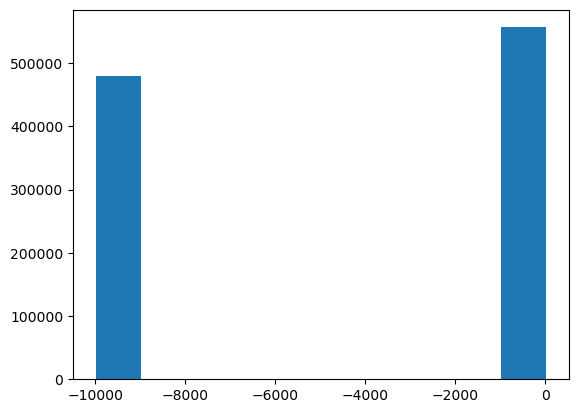

In [6]:
plt.hist(smap_spd.ravel())
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

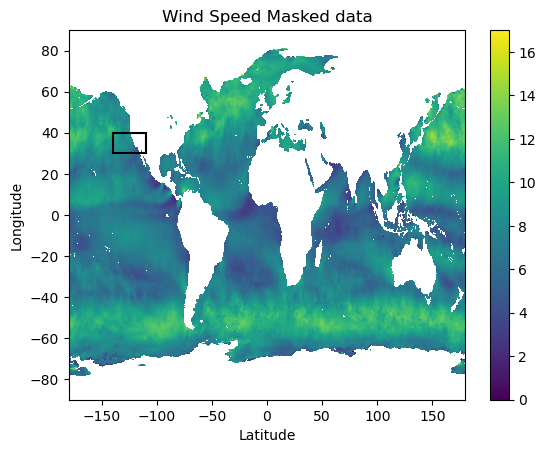

In [21]:
fig = plt.figure()

# mask the SLA, since our masking is big, we want to stop masking at 1000 and apply to our ssh grid
spd_masked = np.ma.masked_where(smap_spd<0, smap_spd)

# make a plot of the SLA, we can make a 2d plot of our data
# if we define the plot as C, then we can add in a colorbar
# plt.pcolormesh(longitude, latitude, ssh), original code 
# vmin=-1, vmax=1, cmap='seismic' was added after we looked at the graph
C = plt.pcolormesh(longitude, latitude, spd_masked, vmin=0, vmax=17)

# add the colorbar
plt.colorbar(C)

# this was added after vmin,vmax and we looked at that map.
# we took this code from one of the prevous codeblock and you need to run it first before running this 
#codeblock
plot_box(plt.gca(), min_lon, min_lat, max_lon, max_lat)
plt.title('Wind Speed Masked data')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# format the figure
plt.show

# Converted time for decimal years and created a graph for my study area with wind values

In [8]:
file_folder = 'D:\\homework\\homework11\\data'
file_list = []

import os
# write a for loop to loop through the files
for file_name in os.listdir(file_folder):
    
    # if the file is an nc file from SMAP, we have to make sure all the files are .nc
      if file_name[-3:] == '.nc':
          file_list.append(file_name)

# sort the file list
file_list.sort()

# print the number of files that are found
print(file_list) 

['SMAP_L3_SSS_201901_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_201902_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_201903_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_201904_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_201905_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_201906_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_201907_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_201908_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_201909_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_201910_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_201911_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_201912_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_202001_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_202002_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_202003_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_202004_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_202005_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_202006_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_202007_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_202008_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_202009_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_202010_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_202011_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_202012_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_202101_MONTHLY_V5.0.nc', 'SMAP_L3_SSS_202102_MONTHLY_V5.0.nc', 'SMAP_L3_SS

In [9]:
date_list = []

# loop through the file name
for file_name in file_list:
    
    # split the file name and retrieve the year and month strings
    file_parts = file_name.split('_')
    # index 3 wll correspond to month and year 
    year = file_parts[3][:4]
    month = file_parts[3][4:6]
    # make a string for the middle day of the month (15)
    day = '15'

    # join the year, month, and day strings with dashes
    # and add the date string to the date_list
    # wind_subset = smap_spd[min_lat_index:max_lat_index, min_lon_index:max_lon_index]
    # mean_wind = np.mean(wind_subset)
    
    date_string = year+'-'+month+'-'+day
    date_list.append(date_string)

# convert the date list to array with the keyword dtype='datetime64'
date_array = np.array(date_list, dtype='datetime64')
print(date_array)

['2019-01-15' '2019-02-15' '2019-03-15' '2019-04-15' '2019-05-15'
 '2019-06-15' '2019-07-15' '2019-08-15' '2019-09-15' '2019-10-15'
 '2019-11-15' '2019-12-15' '2020-01-15' '2020-02-15' '2020-03-15'
 '2020-04-15' '2020-05-15' '2020-06-15' '2020-07-15' '2020-08-15'
 '2020-09-15' '2020-10-15' '2020-11-15' '2020-12-15' '2021-01-15'
 '2021-02-15' '2021-03-15' '2021-04-15' '2021-05-15' '2021-06-15'
 '2021-07-15' '2021-08-15' '2021-09-15' '2021-10-15' '2021-11-15'
 '2021-12-15' '2022-01-15' '2022-02-15' '2022-03-15' '2022-04-15'
 '2022-05-15' '2022-06-15' '2022-07-15' '2022-08-15' '2022-10-15'
 '2022-11-15' '2022-12-15' '2023-01-15' '2023-02-15' '2023-03-15'
 '2023-04-15' '2023-05-15' '2023-06-15' '2023-07-15' '2023-08-15'
 '2023-09-15' '2023-10-15' '2023-11-15' '2023-12-15']


In [10]:
import datetime as dt

def YMD_to_DecYr(year,month,day):
    
    # define a date object using the datetime module
    date = dt.datetime(year,month,day)

    # define the start in ordinal units (days since ...)
    start = dt.date(date.year, 1, 1).toordinal()

    # compute the year_length in ordinal units (365 or 366)
    year_length = dt.date(date.year+1, 1, 1).toordinal() - start

    # compute the fraction based on the date
    decimal_fraction = float(date.toordinal() - start) / year_length

    # compute the decimal year
    dec_yr = year+decimal_fraction
    return(dec_yr)

In [11]:
wind_dec_yrs = []
for file_name in file_list:
    
    # split the file name and retrieve the year and month strings
    file_parts = file_name.split('_')
    # index 3 wll correspond to month and year 
    year = int(file_parts[3][:4])
    month = int(file_parts[3][4:6])
    # make a string for the middle day of the month (15)
    day = int('15')
    dec_yr = YMD_to_DecYr(year,month,day)
    wind_dec_yrs.append(dec_yr)
wind_time=np.array(wind_dec_yrs)
print(wind_time)

[2019.03835616 2019.12328767 2019.2        2019.28493151 2019.36712329
 2019.45205479 2019.53424658 2019.61917808 2019.70410959 2019.78630137
 2019.87123288 2019.95342466 2020.03825137 2020.12295082 2020.20218579
 2020.28688525 2020.36885246 2020.45355191 2020.53551913 2020.62021858
 2020.70491803 2020.78688525 2020.8715847  2020.95355191 2021.03835616
 2021.12328767 2021.2        2021.28493151 2021.36712329 2021.45205479
 2021.53424658 2021.61917808 2021.70410959 2021.78630137 2021.87123288
 2021.95342466 2022.03835616 2022.12328767 2022.2        2022.28493151
 2022.36712329 2022.45205479 2022.53424658 2022.61917808 2022.78630137
 2022.87123288 2022.95342466 2023.03835616 2023.12328767 2023.2
 2023.28493151 2023.36712329 2023.45205479 2023.53424658 2023.61917808
 2023.70410959 2023.78630137 2023.87123288 2023.95342466]


In [12]:
file_path = os.path.join(file_folder, file_list[0])

# open the netCDF file with the nc4.Dataset() method
ds = nc4.Dataset(file_path)

# read in the longitude and latitude variables 
longitude = np.array(ds.variables['longitude'])
latitude = np.array(ds.variables['latitude'])
# read in the sss field
wind_spd = np.array(ds.variables['smap_spd'])

# close the netCDF file
ds.close()

In [13]:
sc_lon = -125
sc_lat = 30
# find the closest indices to the site longitude and latitude
lon_index = np.argmin(np.abs(longitude-sc_lon))
lat_index = np.argmin(np.abs(latitude-sc_lat))

# print the SSS value at this location
spd = wind_spd[lat_index, lon_index]

In [14]:
def read_SPD_from_file(file_path, sc_lon, sc_lat):

    ds = nc4.Dataset(file_path)

    # read in the longitude and latitude variables 
    longitude = np.array(ds.variables['longitude'])
    latitude = np.array(ds.variables['latitude'])
    # read in the sss field
    smap_spd = np.array(ds.variables['smap_spd'])

    # close the netCDF file
    ds.close()
    
    # find the closest indices to the site longitude and latitude
    lon_index = np.argmin(np.abs(longitude-sc_lon))
    lat_index = np.argmin(np.abs(latitude-sc_lat))

    spd = smap_spd[lat_index, lon_index]
    return(spd)

In [15]:
spd_values = []

# loop through the file names
for file_name in file_list:
    
    # define a file path
    file_path = os.path.join(file_folder, file_name)

    # use the sss function to find the sss value for this file
    spd = read_SPD_from_file(file_path, sc_lon, sc_lat)

    # add the sss value to the list
    spd_values.append(spd)
    
print(spd_values)

[6.9154224, 7.3711033, 6.033468, 6.8960676, 6.2999725, 7.256376, 7.9781823, 5.3693786, 6.577809, 7.1360154, 7.309611, 7.1060696, 7.1977987, 7.5562816, 6.140585, 7.6539083, 6.2480345, 7.461578, 6.303928, 6.677433, 6.528935, 6.4191103, 7.1355495, 7.491019, 7.9797153, 7.4960337, 7.2022943, 6.6526394, 8.763054, 6.805721, 6.1889057, 6.324804, 5.790545, 6.630656, 5.0697246, 6.710881, 4.6561747, 7.493079, 7.4465227, 8.673642, 8.862894, 7.0926824, 6.6865106, 6.224164, 6.373713, 6.597953, 5.124892, 8.350023, 8.695982, 7.4634857, 6.498952, 6.24666, 6.614797, 7.768403, 6.7986126, 5.5728655, 5.757525, 6.4191885, 7.31296]


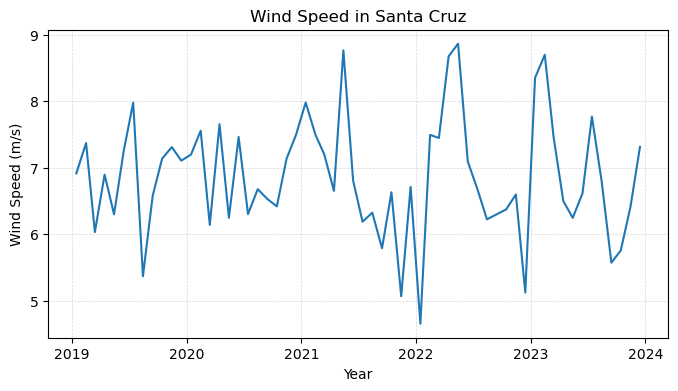

In [16]:
fig = plt.figure(figsize = (8,4))

# plot the data
plt.plot(wind_time, spd_values)
#plt.plot(de,best_fit, 'k--', label= '{:.2f}'.format(slope)+'mm/yr')

# format the plot
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Year')
plt.title('Wind Speed in Santa Cruz')
plt.grid(linewidth=0.5, linestyle='--', alpha=0.5)

In [17]:
file_folder = 'C:\\Users\\Vhaid\\OneDrive\\Desktop\\MS 274\\Projects'
wind_timeseries = np.genfromtxt(os.path.join(file_folder,
                               'Wind_monthly_timeseries.csv'), delimiter=',', skip_header=1)


In [18]:
# df = wind_timeseries

# Convert 'Date' column to datetime format
wind_timeseries['date'] = pd.to_datetime(wind_timeseries['date'], errors='coerce')  # Convert 'Date' column to datetime

# Extract the year from the 'Date' column
wind_timeseries['Year'] = wind_timeseries['date'].dt.year

# Filter data for 2020
df_2020 = wind_timeseries[wind_timeseries['Year'] == 2020]

# Check the filtered data
print(df_2020.head())

# Plot the data for 2020 (assuming 'Wind Speed' and 'Date' columns exist)
plt.figure(figsize=(10, 6))
plt.plot(df_2020['Date'], df_2020['Wind Speed'], label='Wind Speed 2020', color='blue')

# Add titles and labels
plt.title('Wind Speed in 2020')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

# Input data into csv

In [ ]:
wind_time = wind_time
spd_values = spd_values

df = pd.DataFrame({
    'Wind Time': wind_time,  # Column name for wind time
    'Wind Speed': spd_values  # Column name for wind speed
})

# Print the DataFrame to check
print(df)

# Seasonal wind data

In [ ]:
file_folder = 'D:\\homework\\homework11\\data'

file_path= os.path.join(file_folder, 'SMAP_L3_SSS_201901_MONTHLY_V5.0.nc')

ds = nc4.Dataset(file_path)
longitude = np.array(ds.variables['longitude'])
latitude = np.array(ds.variables['latitude'])
wind_spd = np.array(ds.variables['smap_spd'])
ds.close()

wind_spd=wind_spd[0, :]

sum_grid = np.zeros_like(wind_spd)
count_grid= np.zeros_like(wind_spd)

file_list = []

import os
# write a for loop to loop through the files
for file_name in os.listdir(file_folder):
    
    # if the file is an nc file from SMAP, we have to make sure all the files are .nc
      if file_name[-3:] == '.nc':
          file_list.append(file_name)

# sort the file list
file_list.sort()

# print the number of files that are found
print(file_list)

In [ ]:
seasonal_values = {
    'Winter': [],
    'Spring': [],
    'Summer': [],
    'Fall': []
}

# Define months for each season
seasons = {
    'Winter': [12, 1, 2],
    'Spring': [3, 4, 5],
    'Summer': [6, 7, 8],
    'Fall': [9, 10, 11]
}

# Loop through all the files in the file list
for file_name in file_list:
    
    # Extract the year and month from the file name
    year = file_name.split('_')[3][:4]
    month = int(file_name.split('_')[3][4:6])
    
    # Open the dataset and extract variables
    ds = nc4.Dataset(os.path.join(file_folder, file_name))
    smap_spd = np.array(ds.variables['smap_spd'])
    ds.close()
    
    # Mask negative values
    wind_spd_masked = np.ma.masked_where(smap_spd < 0, smap_spd) 
    
    # Loop through the seasons to assign the data to the correct season
    for season, months in seasons.items():
        if month in months:
            # Append data to the correct season list
            seasonal_values[season].append(wind_spd_masked)

# Now we can average the seasonal data by season
seasonal_averages = {}
for season, data_list in seasonal_values.items():
    # Stack all arrays in the list to create a 3D array
    seasonal_data = np.ma.stack(data_list, axis=0)
    
    # Compute the average for each season across all files
    seasonal_averages[season] = np.ma.mean(seasonal_data, axis=0)

# Plotting for Winter
plt.figure(figsize=(10, 6))
plt.pcolormesh(longitude, latitude[::-1], seasonal_averages['Winter'], vmin=0, vmax=30, cmap='viridis')
plt.colorbar(label='Wind Speed (m/s)')
plt.title('Average Winter Wind Speed')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.gca().invert_yaxis()

#Plotting for Spring
plt.figure(figsize=(10, 6))
plt.pcolormesh(longitude, latitude[::-1], seasonal_averages['Spring'], vmin=0, vmax=30, cmap='viridis')
plt.colorbar(label='Wind Speed (m/s)')
plt.title('Average Spring Wind Speed')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.gca().invert_yaxis()

#Plotting for Summer
plt.figure(figsize=(10, 6))
plt.pcolormesh(longitude, latitude[::-1], seasonal_averages['Summer'], vmin=0, vmax=30, cmap='viridis')
plt.colorbar(label='Wind Speed (m/s)')
plt.title('Average Summer Wind Speed')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.gca().invert_yaxis()

#Plotting for Fall
plt.figure(figsize=(10, 6))
plt.pcolormesh(longitude, latitude[::-1], seasonal_averages['Fall'], vmin=0, vmax=30, cmap='viridis')
plt.colorbar(label='Wind Speed (m/s)')
plt.title('Average Fall Wind Speed')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.gca().invert_yaxis()

plt.show()